In [2]:
import pandas as pd

# Load your dataset
leases_df = pd.read_csv("lease_raw.csv")

# Preview the first few rows
leases_df.head()


,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0


In [3]:
# Basic info
leases_df.info()

# Check for missing values
missing = leases_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing)

# Check column names
print("Columns:\n", leases_df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194685 entries, 0 to 194684
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   year                            194685 non-null  int64  
 1   quarter                         194685 non-null  object 
 2   monthsigned                     193822 non-null  float64
 3   market                          194685 non-null  object 
 4   building_name                   157999 non-null  object 
 5   building_id                     194685 non-null  object 
 6   address                         194685 non-null  object 
 7   region                          194685 non-null  object 
 8   city                            194685 non-null  object 
 9   state                           194685 non-null  object 
 10  zip                             194684 non-null  float64
 11  internal_submarket              194685 non-null  object 
 12  internal_class  

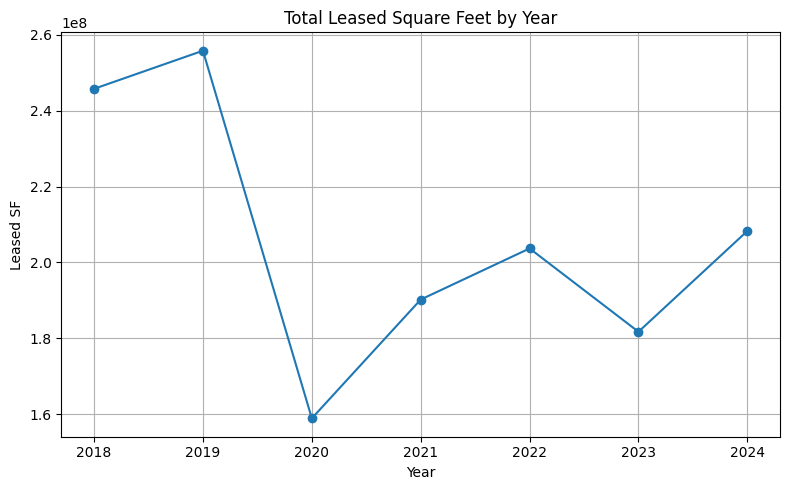

In [4]:
# Ensure year is numeric
leases_df['year'] = pd.to_numeric(leases_df['year'], errors='coerce')

# Group by year to see total leasing
lease_by_year = leases_df.groupby('year')['leasedSF'].sum().reset_index()

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(lease_by_year['year'], lease_by_year['leasedSF'], marker='o')
plt.title('Total Leased Square Feet by Year')
plt.xlabel('Year')
plt.ylabel('Leased SF')
plt.grid(True)
plt.tight_layout()
plt.show()
